### Bias analysis using AEquitas toolkit on UCI diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import aequitas as ae
from aequitas.preprocessing import preprocess_input_df
import matplotlib.pyplot as plt

In [2]:
FILE = 'ae_subset.csv'

ae_subset_df = pd.read_csv(FILE)

In [3]:
ae_subset_df.head()

,race,gender,score,label_value
0,Caucasian,Male,0,0
1,Caucasian,Female,0,0
2,Caucasian,Male,0,0
3,?,Female,0,0
4,Caucasian,Female,1,1


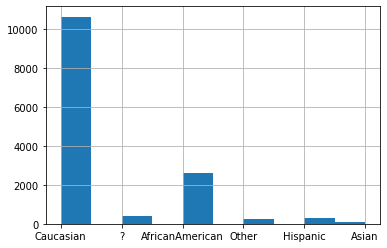

In [4]:
# plot histogram for races
plt.hist(ae_subset_df['race'])
plt.grid()

### The majority group is Caucasian. We will take this group as reference group in Bias analysis

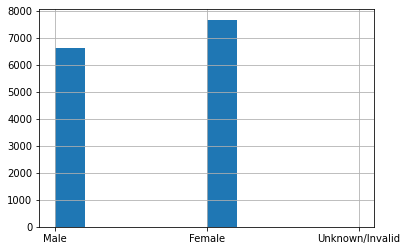

In [5]:
# plot histogram for gender
plt.hist(ae_subset_df['gender'])
plt.grid()

### Analysis with AEquitas

In [6]:
df, _ = preprocess_input_df(ae_subset_df)

In [7]:
from aequitas.group import Group

# compute the crosstab
g = Group()
xtab, _ = g.get_crosstabs(df)

In [8]:
absolute_metrics = g.list_absolute_metrics(xtab)

xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,?,0.64,0.79,0.20,0.38,0.21,0.36,0.80,0.62,0.03,0.37,0.36
1,race,AfricanAmerican,0.60,0.82,0.22,0.35,0.18,0.40,0.78,0.65,0.18,0.33,0.36
2,race,Asian,0.63,0.76,0.16,0.49,0.24,0.37,0.84,0.51,0.01,0.35,0.28
3,race,Caucasian,0.60,0.81,0.22,0.36,0.19,0.40,0.78,0.64,0.75,0.34,0.36
4,race,Hispanic,0.55,0.88,0.18,0.33,0.12,0.45,0.82,0.67,0.01,0.25,0.30
5,race,Other,0.65,0.82,0.15,0.40,0.18,0.35,0.85,0.60,0.02,0.32,0.30
6,gender,Female,0.60,0.80,0.23,0.35,0.20,0.40,0.77,0.65,0.55,0.35,0.37
7,gender,Male,0.59,0.82,0.20,0.37,0.18,0.41,0.80,0.63,0.45,0.32,0.34
8,gender,Unknown/Invalid,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.50,0.50


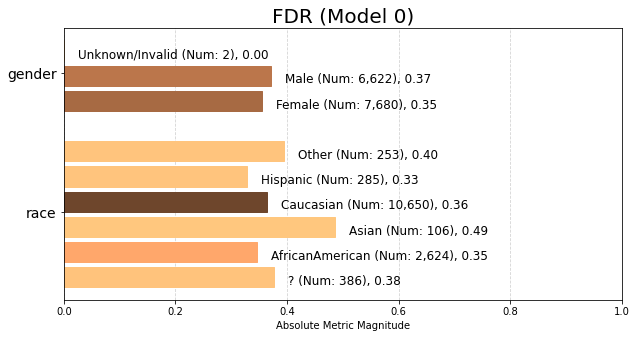

In [9]:
from aequitas.plotting import Plot
    
aqp = Plot()
fdr_plot = aqp.plot_group_metric(xtab, 'fdr')

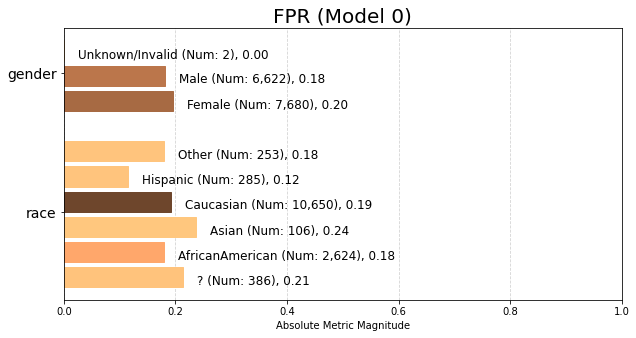

In [15]:
fpr_plot = aqp.plot_group_metric(xtab, 'fpr')

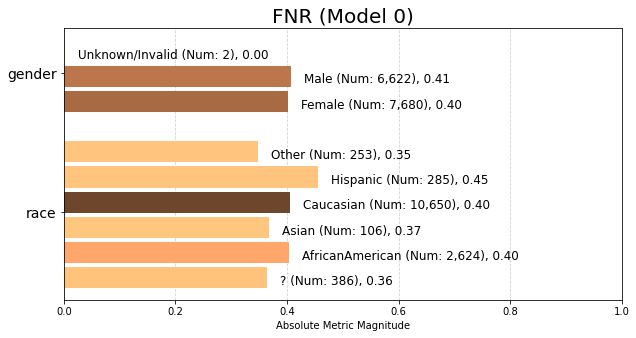

In [16]:
fnr_plot = aqp.plot_group_metric(xtab, 'fnr')

In [10]:
from aequitas.bias import Bias
    
b = Bias()
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                        ref_groups_dict={'race':'Caucasian', 'gender':'Male'}, 
                                        alpha=0.05, 
                                        check_significance=False)

get_disparity_predefined_group()


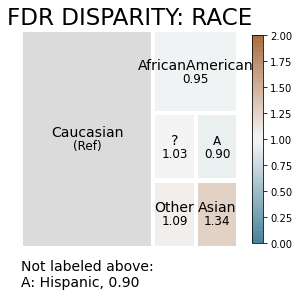

In [11]:
# questo grafico evidenzia la disparità in Asian per quanto riguarda FDR
fpr_disparity = aqp.plot_disparity(bdf, group_metric='fdr_disparity', 
                                       attribute_name='race')

In [12]:
from aequitas.fairness import Fairness
    
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

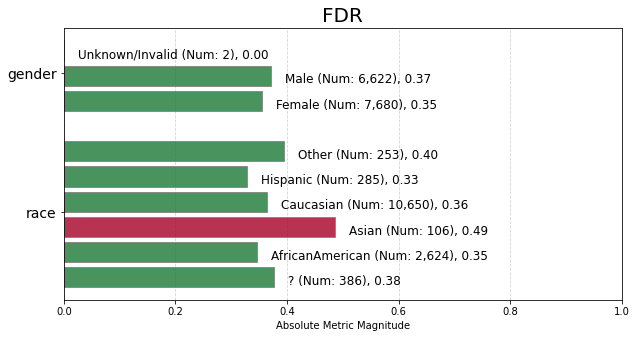

In [13]:
fdr_fairness = aqp.plot_fairness_group(fdf, group_metric='fdr', title=True)

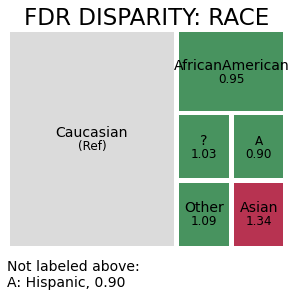

In [14]:
fdr_disparity_fairness = aqp.plot_fairness_disparity(fdf, group_metric='fdr', attribute_name='race')